<a href="https://colab.research.google.com/github/GimenesPaula/GimenesPaula/blob/main/Celu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Dominant Color
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from collections import Counter
import pprint

In [2]:
#Image Difference with OpenCV and Python
# import the necessary packages
from skimage.metrics import structural_similarity as compare_ssim
import argparse
import imutils

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from keras.preprocessing import image

In [5]:
#Importa arquivo a ser tratado
from google.colab import files
uploaded = files.upload()

Saving 01.jpg to 01.jpg
Saving 02.jpg to 02.jpg
Saving 03.jpg to 03.jpg
Saving 04.jpg to 04.jpg
Saving 05.jpg to 05.jpg
Saving 06.jpg to 06.jpg
Saving 07.jpg to 07.jpg
Saving 08.jpg to 08.jpg
Saving 09.jpg to 09.jpg
Saving 10.jpg to 10.jpg
Saving 11.jpg to 11.jpg
Saving 12.jpg to 12.jpg
Saving 13.jpg to 13.jpg
Saving 14.jpg to 14.jpg
Saving 042.jpg to 042.jpg


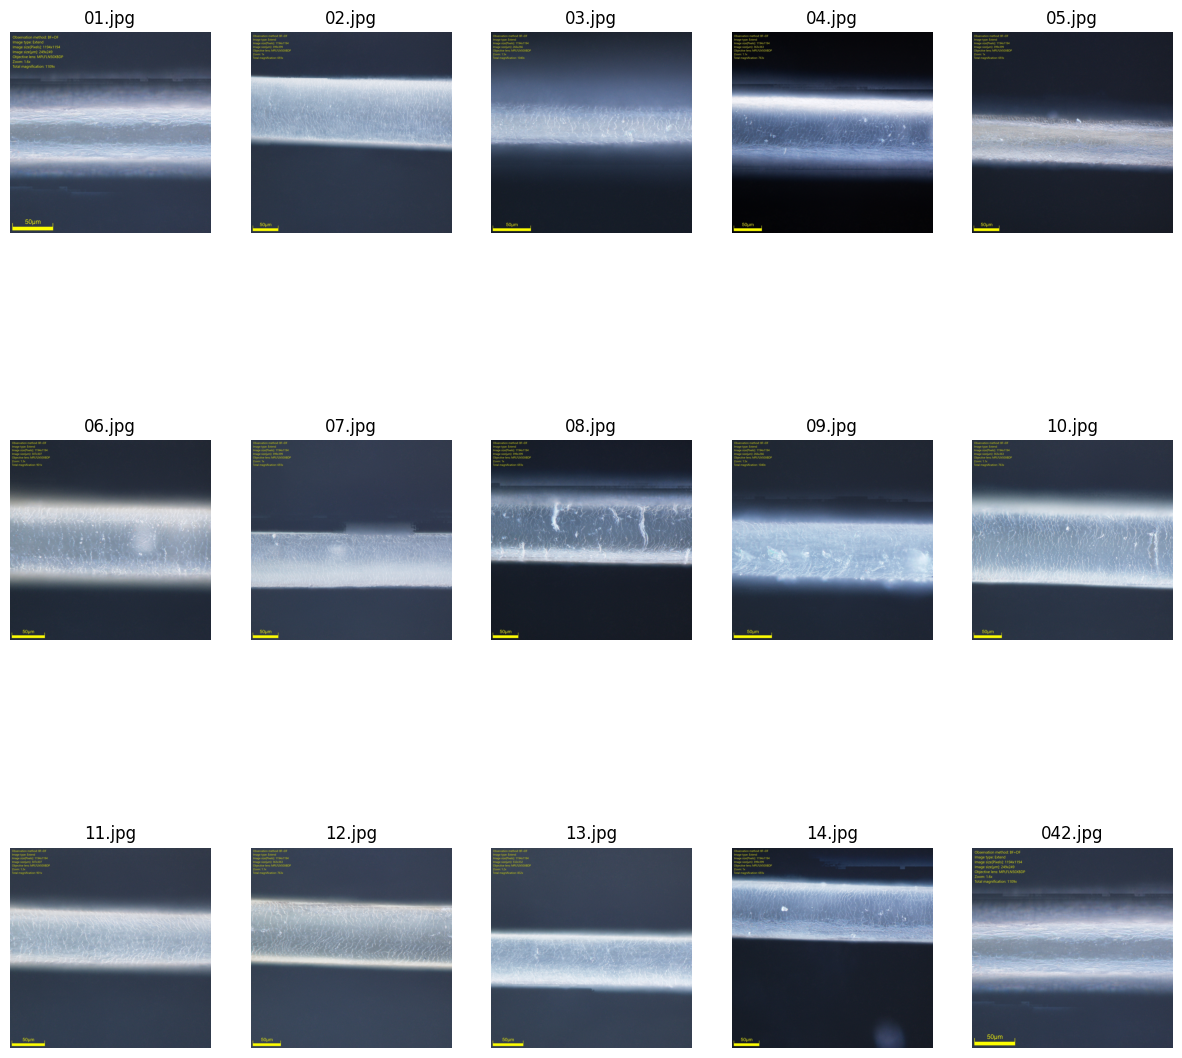

In [32]:
#exibe imagens Original
fig = plt.figure(figsize=(15,15))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
  plt.subplot(3,5,num+1)    # the number of images in the grid is 3*5 (15)
  plt.axis('off')
  plt.title(fn)
  plt.imshow(img)

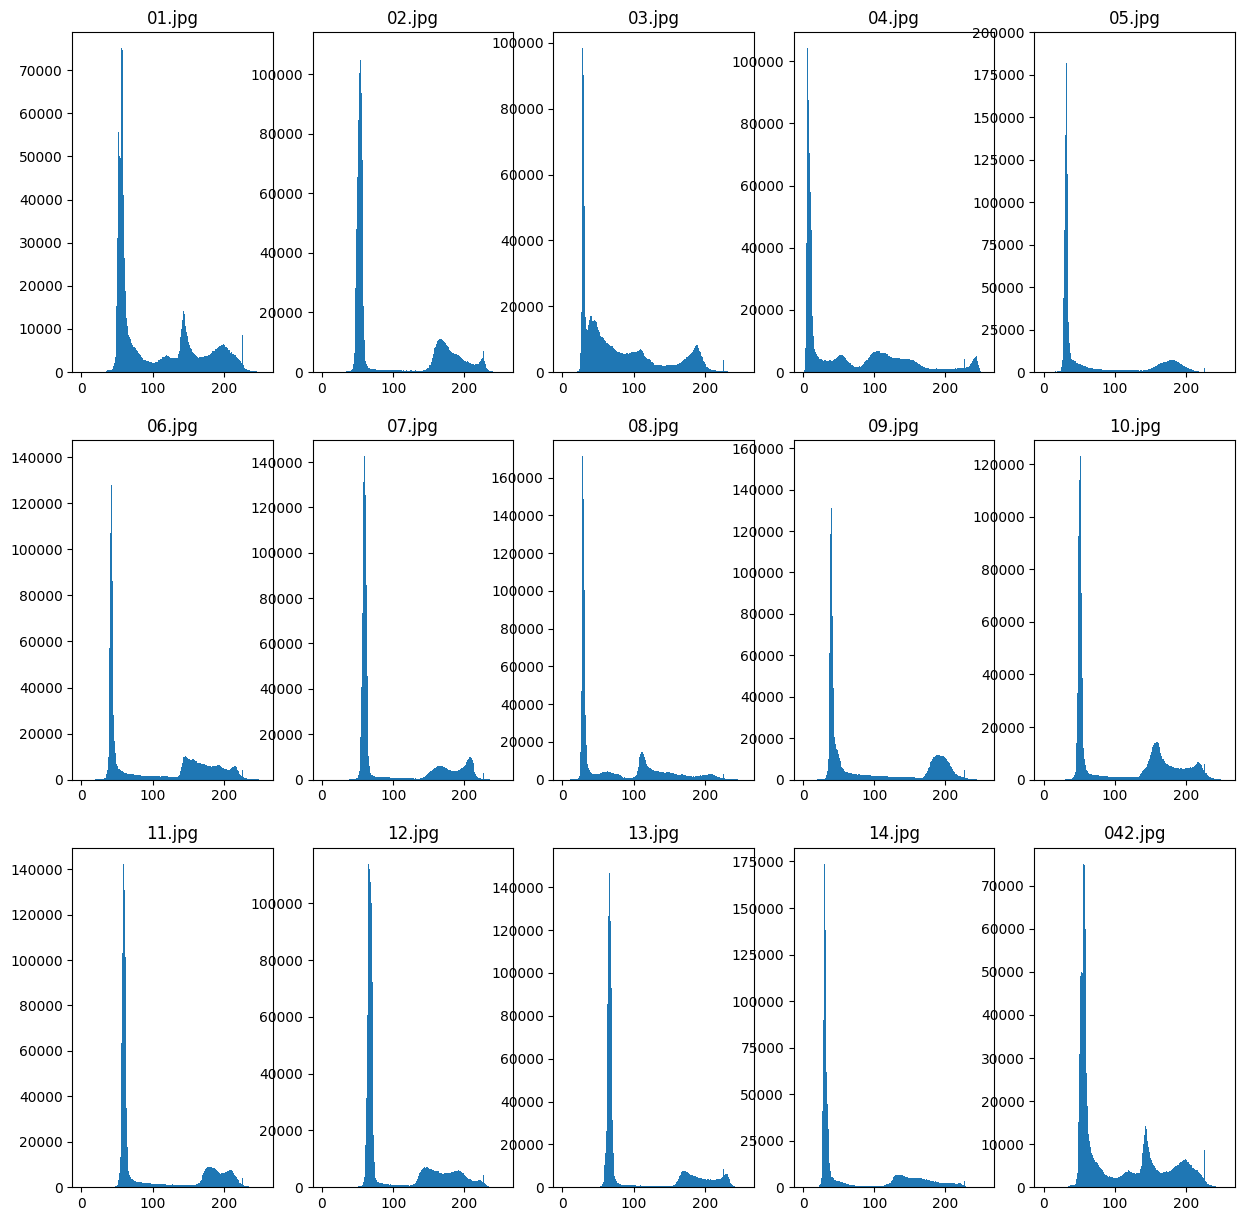

In [50]:
#Imagens em cinza / Histograma
fig = plt.figure(figsize=(15,15))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY) #preto e Branco
  plt.subplot(3,5,num+1),plt.hist(img.ravel(),bins = 256, range = [0,256])    # the number of images in the grid is 3*5 (15)
  #plt.axis('off')
  plt.title(fn)

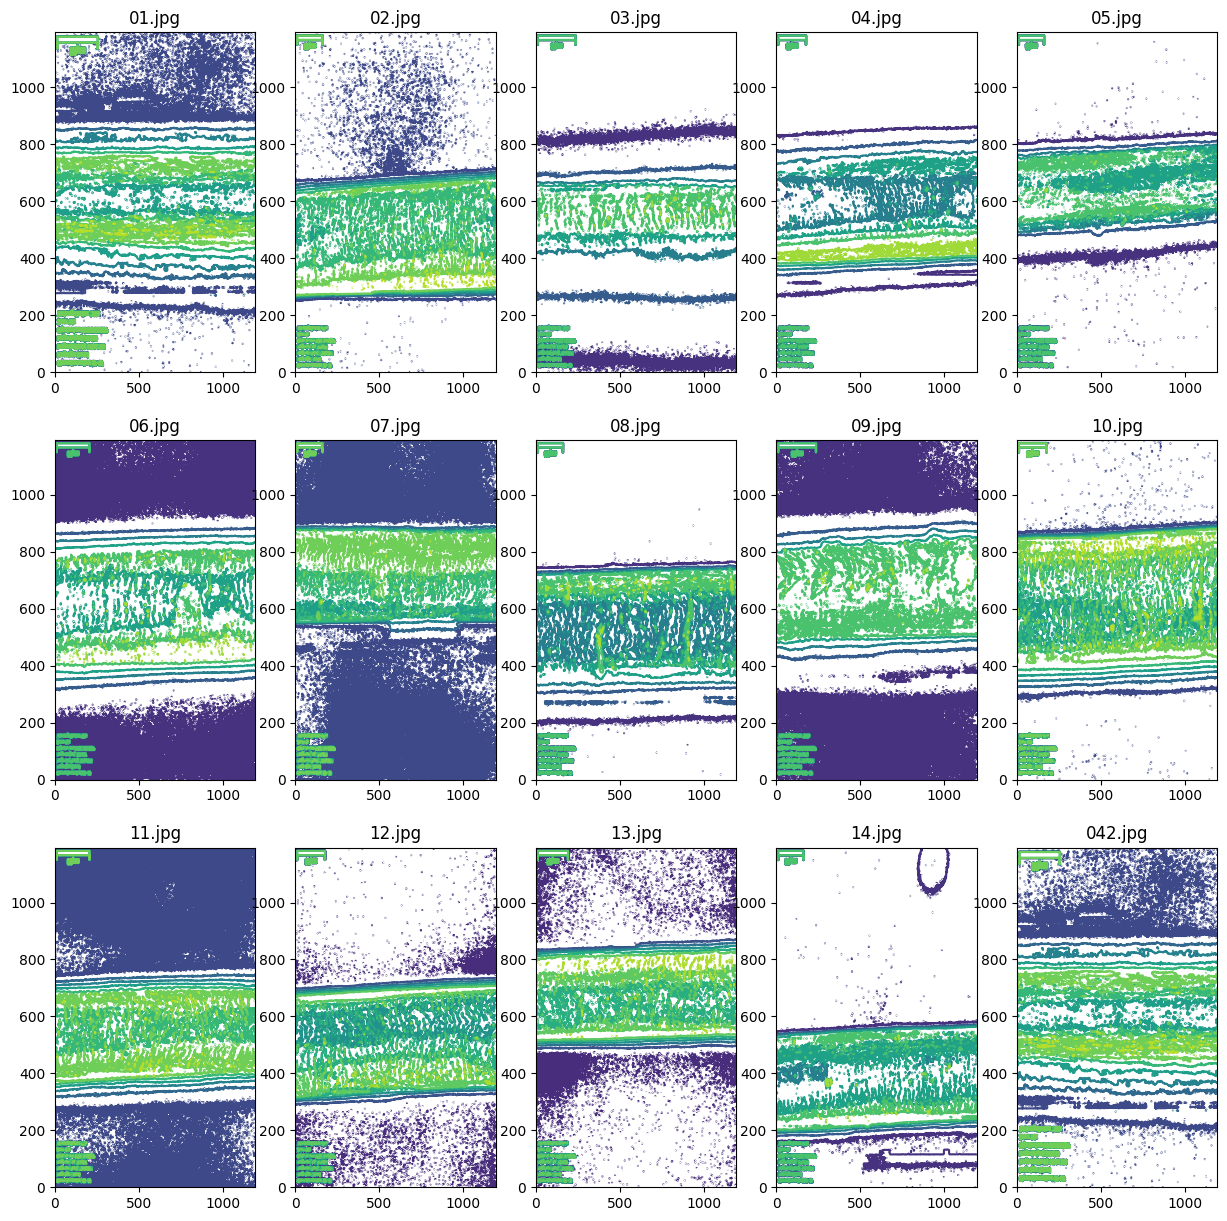

In [53]:
#Imagens em cinza / Contorno
fig = plt.figure(figsize=(15,15))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY) #preto e Branco
  plt.subplot(3,5,num+1),plt.contour(img)    # the number of images in the grid is 3*5 (15)
  #plt.axis('off')
  plt.title(fn)

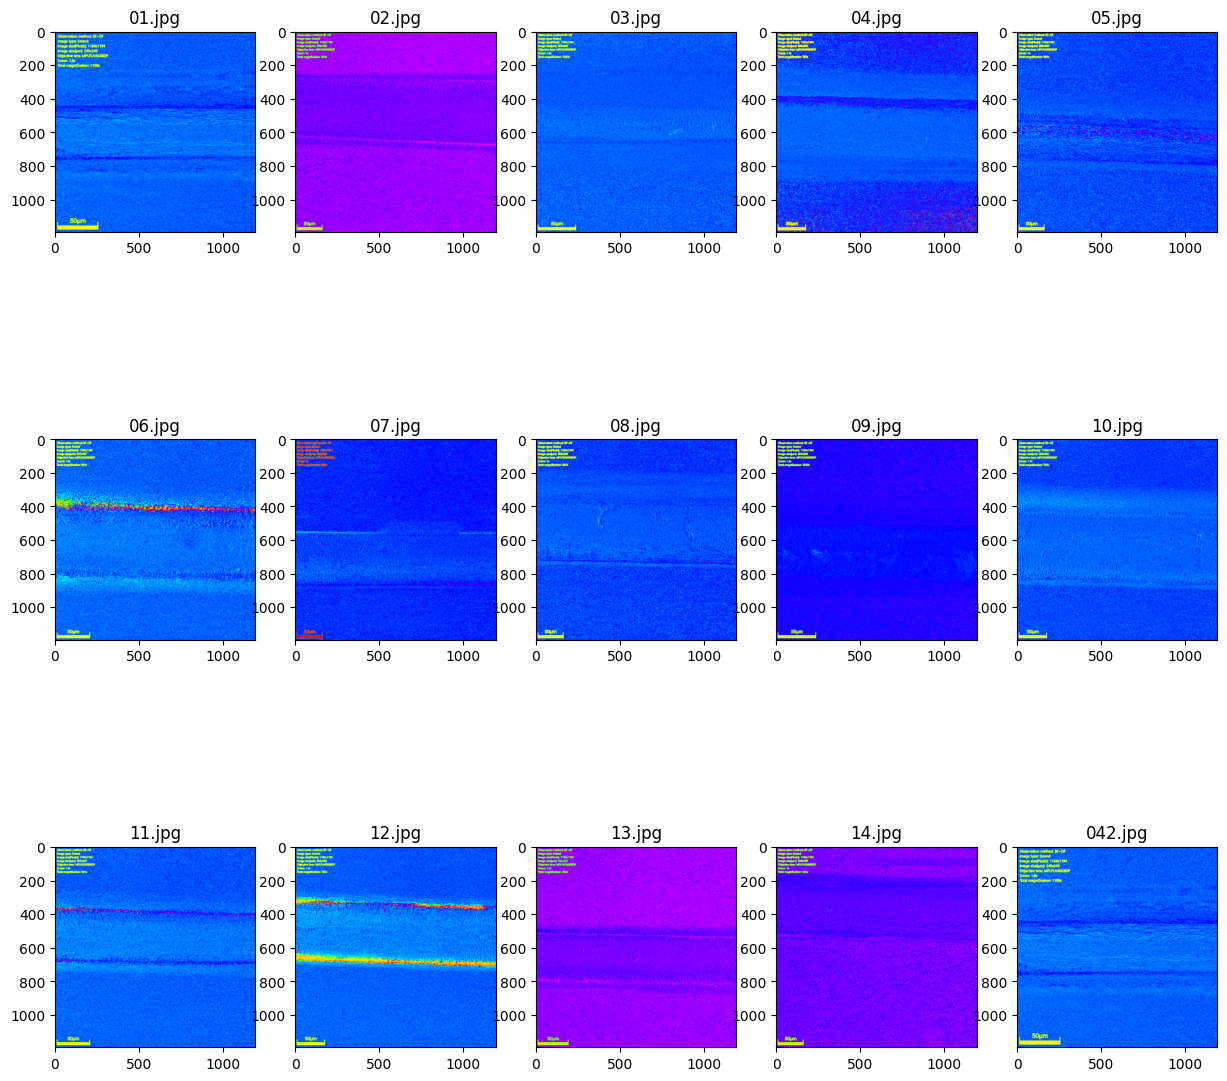

In [54]:
#Imagens em Huve
fig = plt.figure(figsize=(15,15))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2HSV) #preto e Branco
  plt.subplot(3,5,num+1)
  #plt.axis('off')
  plt.title(fn)
  plt.imshow(img[:,:,0], cmap = 'hsv')

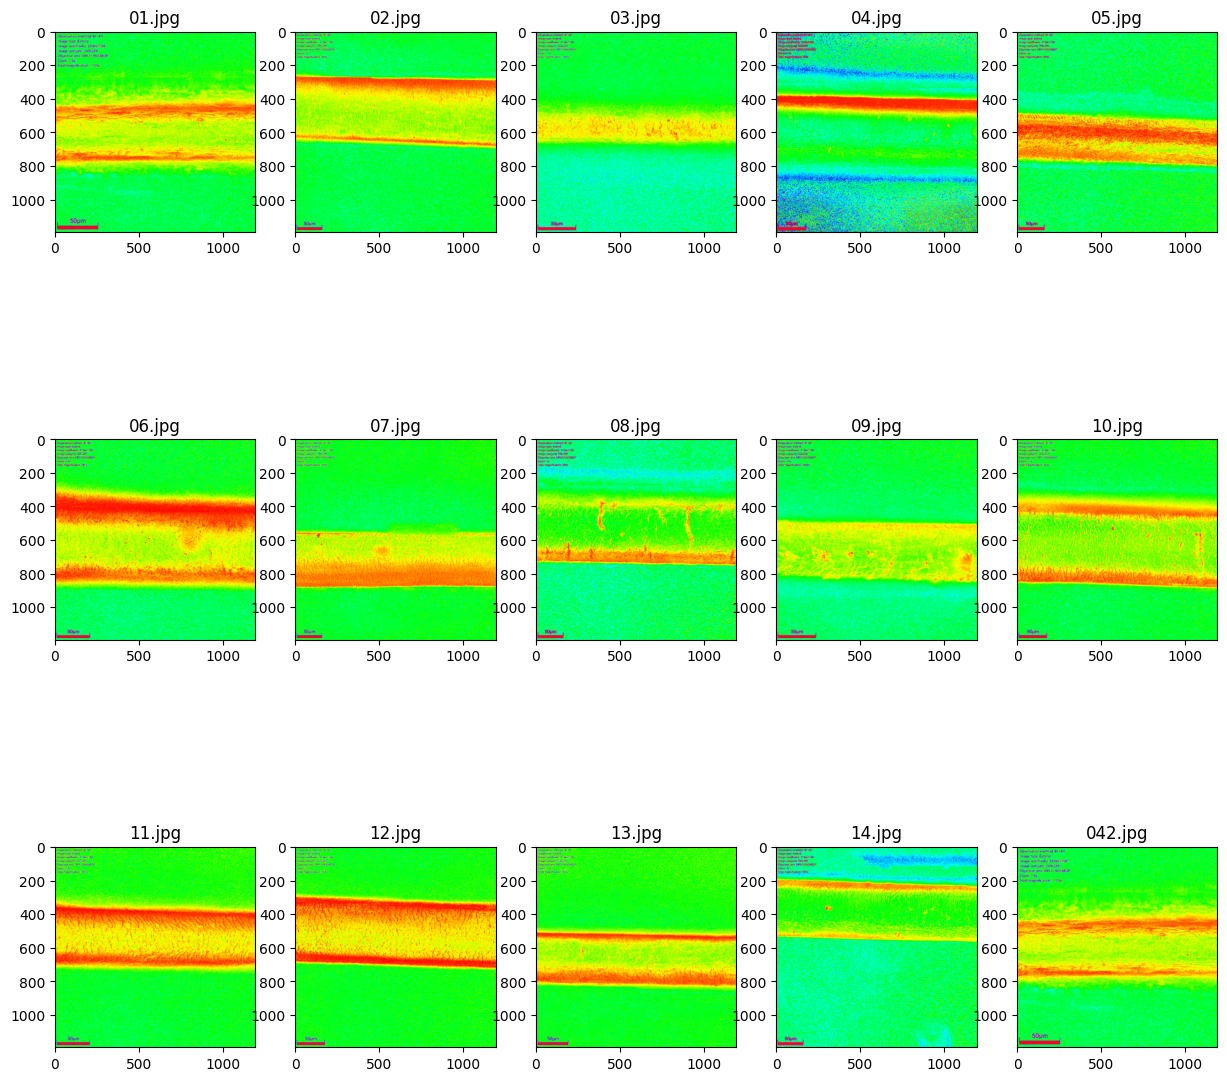

In [57]:
#Imagens em Saturation
fig = plt.figure(figsize=(15,15))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2HSV) #preto e Branco
  plt.subplot(3,5,num+1)
  #plt.axis('off')
  plt.title(fn)
  plt.imshow(img[:,:,1], cmap = 'hsv')

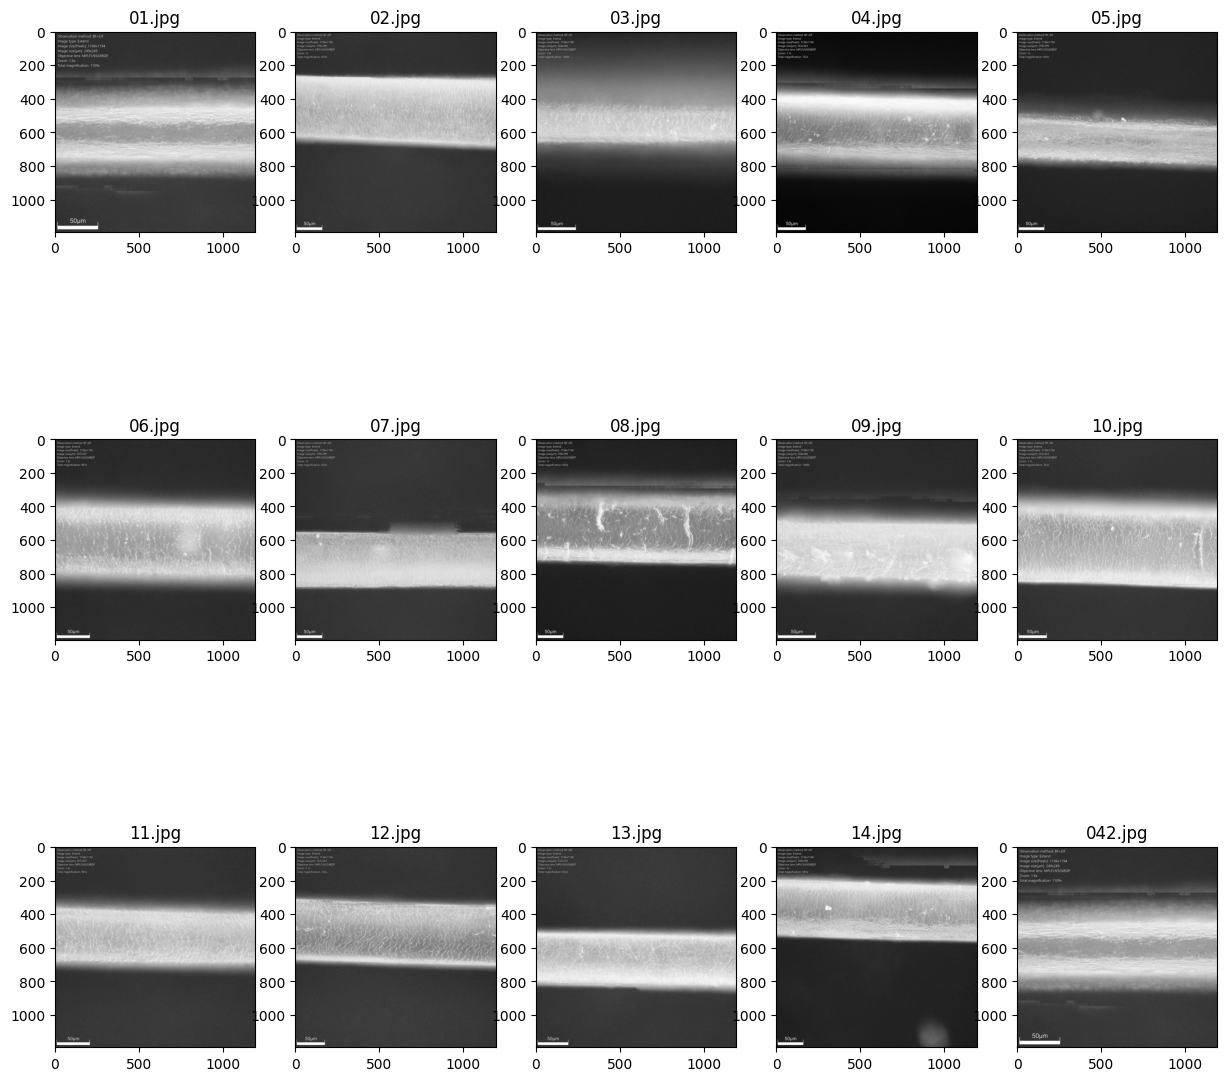

In [59]:
#Compara em Valor
fig = plt.figure(figsize=(15,15))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2HSV) #preto e Branco
  plt.subplot(3,5,num+1)
  #plt.axis('off')
  plt.title(fn)
  plt.imshow(img[:,:,2], cmap = 'gray')

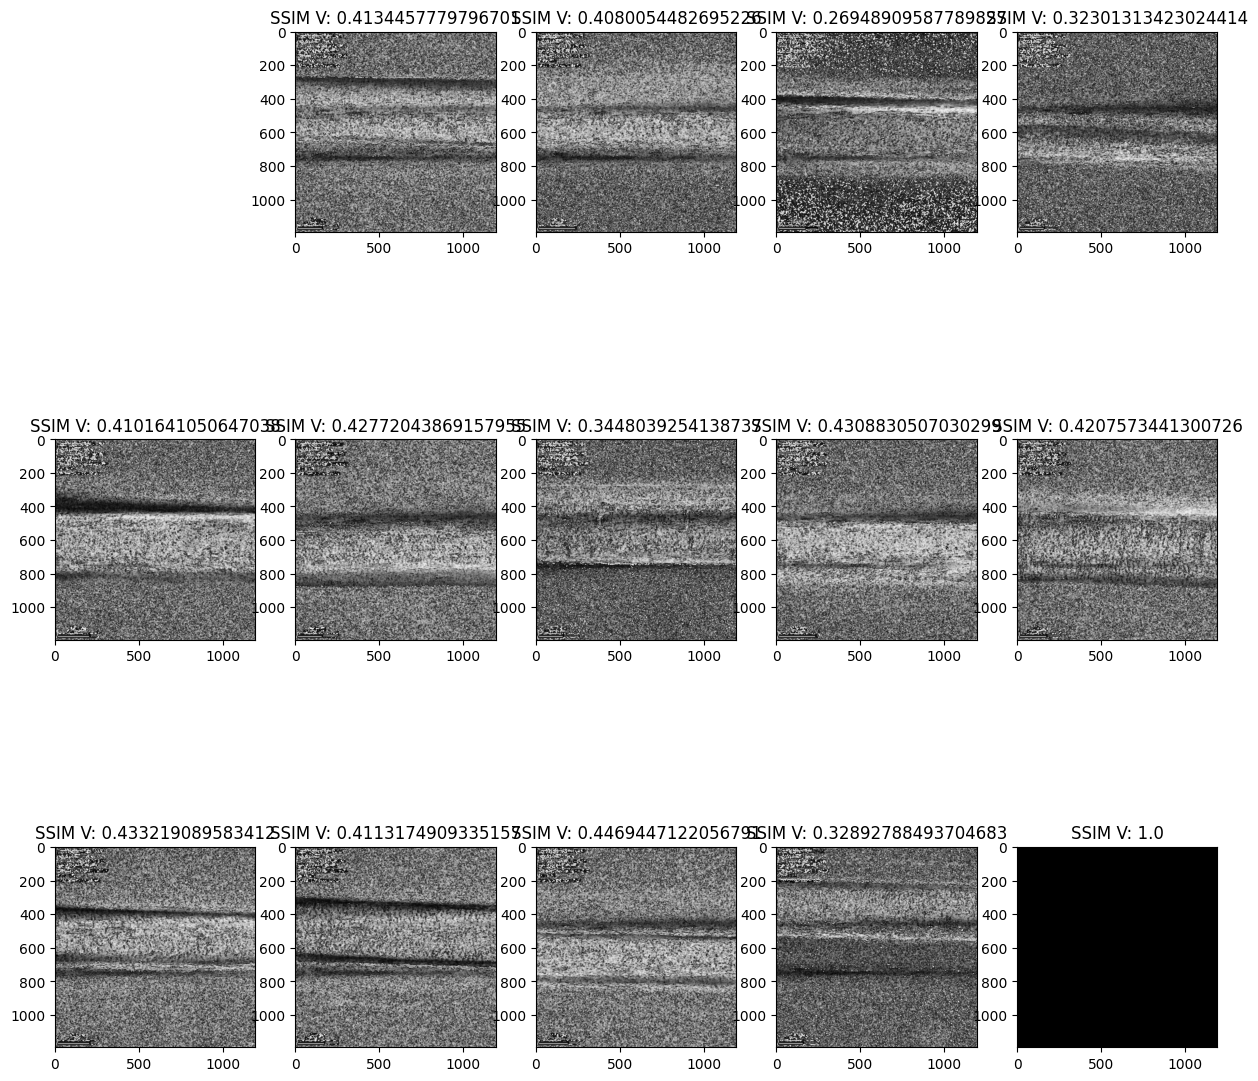

In [69]:
#Calcula Score de diff
fig = plt.figure(figsize=(15,15))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  if num == 0:
    antes = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2HSV) #preto e Branco
  else:
    depois = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2HSV) #preto e Branco
    plt.subplot(3,5,num+1)
    #plt.axis('off')
    (score, diff) = compare_ssim(depois[:,:,1], antes[:,:,1], full=True)
    diff = (diff * 255).astype("uint8")
    plt.title("SSIM V: {}".format(score))
    plt.imshow(diff, cmap = 'gray')

In [62]:
#remove componentes de baixa frequencia
def componente (img):
  # Blur the grayscale image by a Guassian filter with kernel size of 10
  imBlur = cv2.blur(img,(2,2))
  # Transform the image to frequency domain
  f = np.fft.fft2(imBlur)
  # Bring the zero-frequency component to the center
  fshift = np.fft.fftshift(f)
  magnitude_spectrum = 30*np.log(np.abs(fshift))

  #This section demonstrates conducting a high pass filter to remove the low frequency component, resulting in a sharpened image which contains the edges
  rows, cols = imBlur.shape
  crow,ccol = round(rows/2) , round(cols/2)
  # remove low frequencies with a rectangle size of 10
  fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
  f_ishift = np.fft.ifftshift(fshift)
  img_back = np.fft.ifft2(f_ishift)
  img_back = np.abs(img_back)

NameError: name 'img_back' is not defined

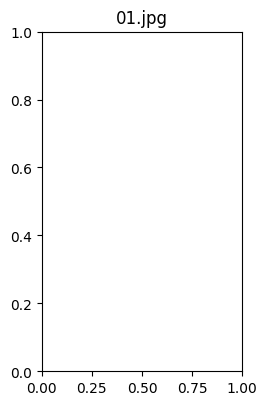

In [66]:
#remove compontente de baixa frequencia
fig = plt.figure(figsize=(15,15))
for num, fn in enumerate(uploaded.keys()):
  path = fn
  img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY) #preto e Branco
  componente(img)
  plt.subplot(3,5,num+1)
  #plt.axis('off')
  plt.title(fn)
  plt.imshow(img_back, cmap = 'gray')